In [1]:
set.seed(100)
library(dplyr)
library(tidyr)
install.packages("fpp2")
library(fpp2)
library(zoo)
library(readr)
library(dplyr)
library(forecast)
setwd("C:\\Users\\Grigor\\OneDrive\\Desktop\\Master_Program\\ADS506\\Project")
PotHoles <- read.csv("get_it_done_pothole_requests_datasd_v1.csv")

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"

package 'fpp2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Grigor\AppData\Local\Temp\RtmpMFdJzd\downloaded_packages


Warning message:
"package 'fpp2' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
-- Attaching packages ---------------------------------------------- fpp2 2.4 --
v ggplot2   3.3.5     v fma       2.4  
v forecast  8.14      v expsmooth 2.3  
Warning message:
"package 'forecast' was built under R version 3.6.3"Warning message:
"package 'fma' was built under R version 3.6.3"Warning message:
"package 'expsmooth' was built under R version 3.6.3"

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'readr' was built under R version 3.6.3"

In [2]:
head(PotHoles)

service_request_id,service_request_parent_id,sap_notification_number,date_requested,case_age_days,case_record_type,service_name,service_name_detail,date_closed,status,...,zipcode,council_district,comm_plan_code,comm_plan_name,park_name,case_origin,referred,iamfloc,floc,public_description
131444,NA,40300098612,2017-01-09T16:22:00,1738,TSW,Pothole,NA,2021-10-13,Closed,...,92110,2,30,Peninsula,,Web,,SS-003583-PV1,SS-003583-PV1,"the entire street is a pothole, and has been for the last seven years Great it is closed and the damn street is still a nothing but potholes"
2403110,2401124,NA,2018-09-18T14:39:00,930,TSW,Pothole,NA,2021-04-05,Closed,...,92120,9,38,College Area,,Phone,,SS-007582-PV1,SS-007582-PV1,TWO POTHOLES COLLEGE AV N BETWEEN I 8 & CAPRI RIGHT LANE
2403347,2403345,NA,2018-09-18T18:27:00,1130,TSW,Pothole,NA,2021-10-22,Closed,...,92139,4,44,Skyline-Paradise Hills,,Web,,SS-024890-PV1,SS-024890-PV1,I have submitted multiple requests! Potholes damaging tires and vehicles. Street needs to be repaved! Please send a supervisor to evaluate the street!
2406519,2401124,NA,2018-09-22T10:54:00,926,TSW,Pothole,NA,2021-04-05,Closed,...,92120,7,20,Navajo,,Mobile,,SS-007582-PV1,SS-007582-PV1,Southbound Lanes of College approaching I-8 westbound to ramp
2418337,2418290,NA,2018-10-08T14:15:00,1504,TSW,Pothole,NA,,In Process,...,92037,1,10,La Jolla,,Web,,SS-010104-PV1,SS-010104-PV1,This street also has many grooves and potholes that need filling and repaving.
2462582,2462578,NA,2018-12-11T09:58:00,1440,TSW,Pothole,NA,,In Process,...,92103,3,42,Uptown,,Mobile,,SS-029913-PV1,SS-029913-PV1,Foot of maple canyon


In [3]:
is.na(PotHoles)

service_request_id,service_request_parent_id,sap_notification_number,date_requested,case_age_days,case_record_type,service_name,service_name_detail,date_closed,status,...,zipcode,council_district,comm_plan_code,comm_plan_name,park_name,case_origin,referred,iamfloc,floc,public_description
FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [4]:
str(PotHoles)
#df <- filter(PotHoles, rowSums(is.na(PotHoles)) != ncol(PotHoles))

'data.frame':	27246 obs. of  23 variables:
 $ service_request_id       : int  131444 2403110 2403347 2406519 2418337 2462582 2473007 2478933 2486067 2487936 ...
 $ service_request_parent_id: int  NA 2401124 2403345 2401124 2418290 2462578 2463591 2477128 NA 2487942 ...
 $ sap_notification_number  : num  4.03e+10 NA NA NA NA ...
 $ date_requested           : Factor w/ 25680 levels "2017-01-09T16:22:00",..: 1 16 17 18 19 20 21 22 23 24 ...
 $ case_age_days            : num  1738 930 1130 926 1504 ...
 $ case_record_type         : Factor w/ 3 levels "Storm Water Code Enforcement",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ service_name             : Factor w/ 1 level "Pothole": 1 1 1 1 1 1 1 1 1 1 ...
 $ service_name_detail      : logi  NA NA NA NA NA NA ...
 $ date_closed              : Factor w/ 623 levels "","2021-01-01",..: 257 89 265 89 1 1 89 506 104 306 ...
 $ status                   : Factor w/ 4 levels "Closed","In Process",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ lat                      : num  32.8 

In [5]:
df <- PotHoles[ -c(3,8,16,18,21,22:23) ]
df

service_request_id,service_request_parent_id,date_requested,case_age_days,case_record_type,service_name,date_closed,status,lat,lng,street_address,zipcode,council_district,comm_plan_name,case_origin,referred
131444,NA,2017-01-09T16:22:00,1738,TSW,Pothole,2021-10-13,Closed,32.75192,-117.2236,"2869 Barnard Street, San Diego, CA, United States",92110,2,Peninsula,Web,
2403110,2401124,2018-09-18T14:39:00,930,TSW,Pothole,2021-04-05,Closed,32.77245,-117.0689,"COLLEGE AV, 92115",92120,9,College Area,Phone,
2403347,2403345,2018-09-18T18:27:00,1130,TSW,Pothole,2021-10-22,Closed,32.68479,-117.0291,"1847 Sherbrooke St, San Diego, CA 92139, USA",92139,4,Skyline-Paradise Hills,Web,
2406519,2401124,2018-09-22T10:54:00,926,TSW,Pothole,2021-04-05,Closed,32.78254,-117.0625,"5661 College Ave, San Diego, CA 92120, USA",92120,7,Navajo,Mobile,
2418337,2418290,2018-10-08T14:15:00,1504,TSW,Pothole,,In Process,32.83122,-117.2609,"1515 El Paso Real, La Jolla, CA 92037, USA",92037,1,La Jolla,Web,
2462582,2462578,2018-12-11T09:58:00,1440,TSW,Pothole,,In Process,32.73233,-117.1680,5426 W Maple St,92103,3,Uptown,Mobile,
2473007,2463591,2018-12-27T20:11:00,830,TSW,Pothole,2021-04-05,Closed,32.82194,-117.1490,"8110 Balboa Ave, San Diego, CA 92111, USA",92111,6,Kearny Mesa,Mobile,
2478933,2477128,2019-01-07T06:31:00,1285,TSW,Pothole,2022-07-15,Closed,32.76291,-117.0670,4710 College Ave,92115,9,College Area,Mobile,
2486067,NA,2019-01-16T07:35:00,827,TSW,Pothole,2021-04-22,Closed,32.68808,-117.1253,CA-15 S,92136,8,Military Facilities,Mobile,This report has been referred to Caltrans San Diego at ct.public.information.d11@dot.ca.gov
2487936,2487942,2019-01-18T07:25:00,1058,TSW,Pothole,2021-12-11,Closed,32.75475,-117.0583,"6372 University Ave, San Diego, CA 92115, USA",92115,9,Mid-City:Eastern Area,Mobile,


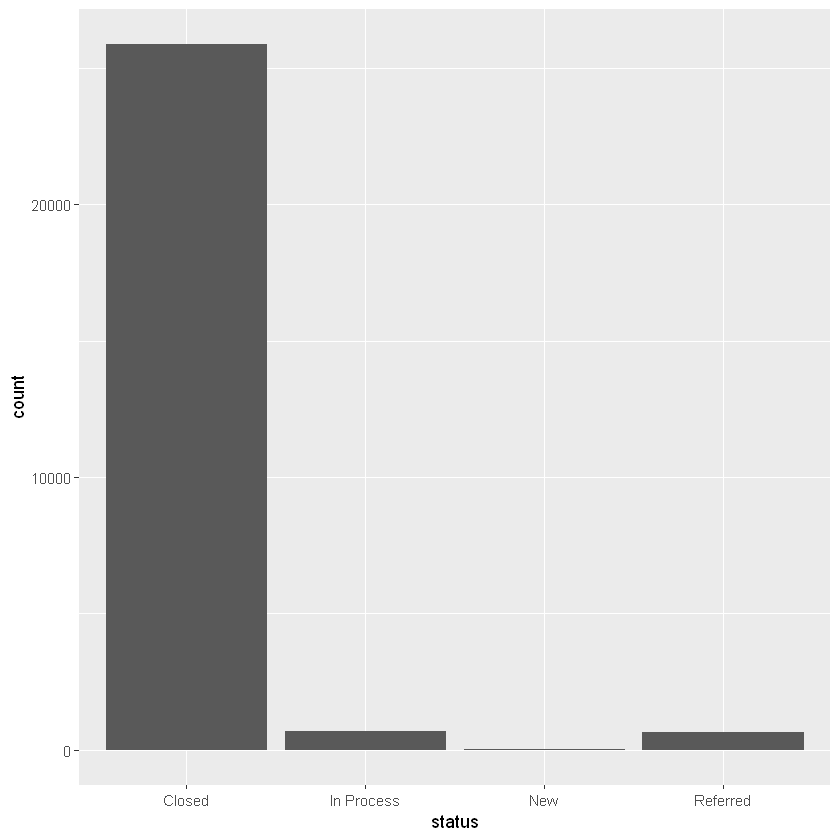

In [6]:
ggplot(data = df) + geom_bar(mapping = aes(x=status))

In [7]:
print(cor(df$case_age_days,df$zipcode))

[1] NA


zipcode,n
92126,1735
92117,1670
92111,1592
92104,1414
92037,1402
92115,1386
92103,1333
92128,1292
92101,1230
92105,1058


Warning message:
"Removed 135 rows containing non-finite values (stat_count)."

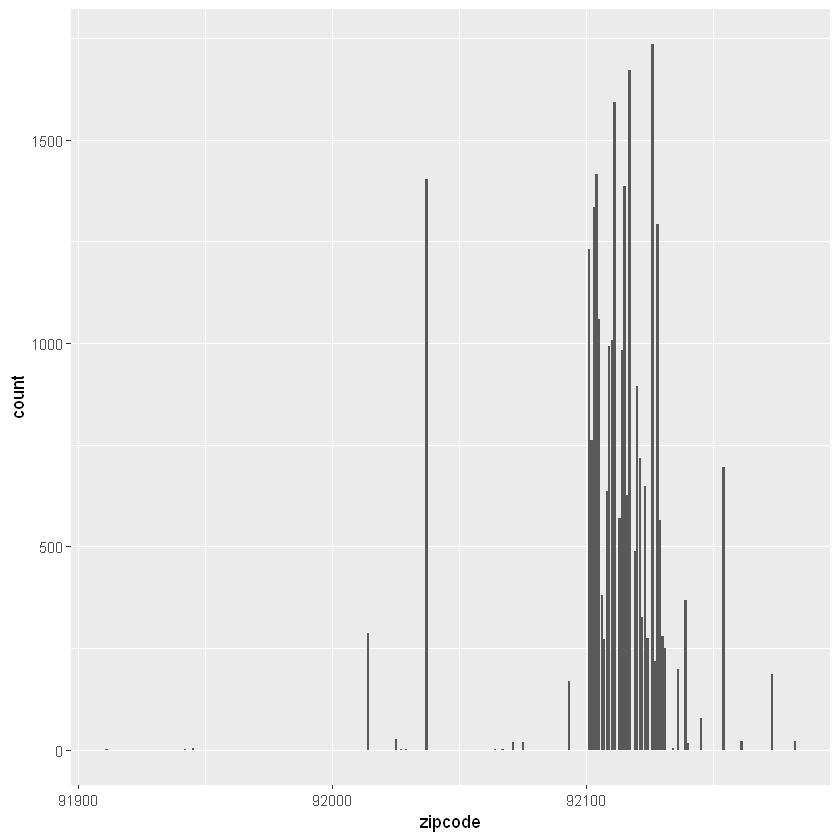

In [8]:
df %>% count(zipcode, sort = TRUE)
# Histogram
ggplot(df) + geom_bar(mapping = aes(zipcode))

In [9]:
df.ts <- ts(df$date_closed, start = c(2017,1), end = c(2022,11), freq = 12)
df.ts

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,257,89,265,89,1,1,89,506,104,306,89,89
2018,1,77,77,89,219,77,104,219,104,77,104,104
2019,104,104,104,104,92,104,104,104,104,104,104,104
2020,219,89,89,89,104,89,104,235,1,1,146,1
2021,219,219,219,1,1,1,1,365,1,220,104,350
2022,1,265,220,1,349,95,243,243,219,1,1,


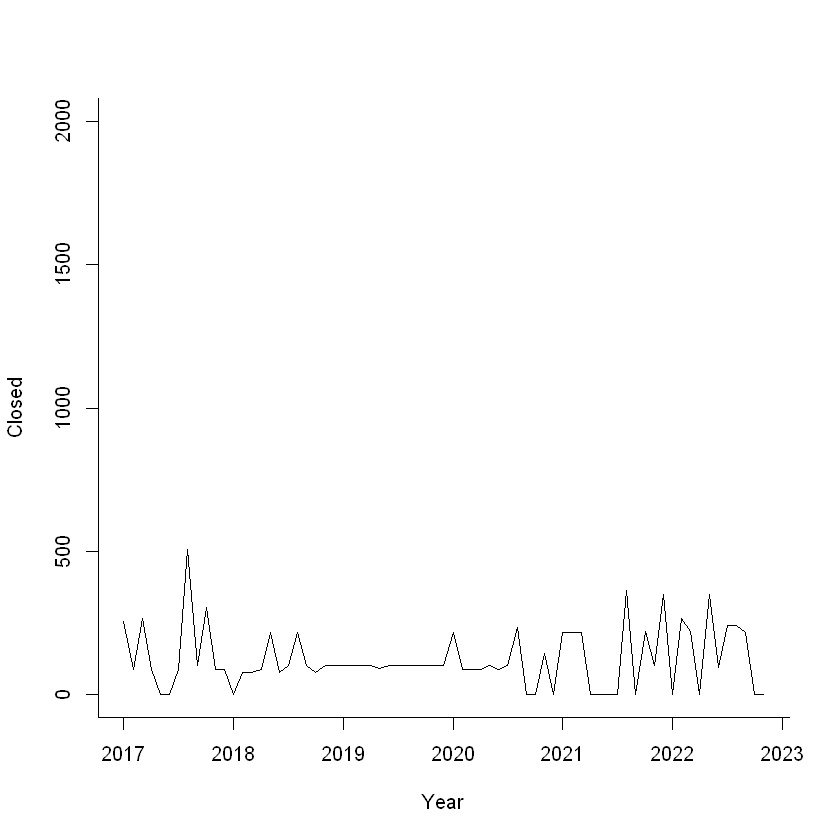

In [10]:
plot(df.ts, xlab = "Year", ylab = "Closed", ylim = c(1, 2000), bty = "l")

In [11]:
my_arima <- arima(df.ts, order = c(1, 1, 3))
summary(my_arima)


Call:
arima(x = df.ts, order = c(1, 1, 3))

Coefficients:
          ar1      ma1      ma2      ma3
      -0.2964  -0.7822  -0.0276  -0.1902
s.e.   0.5856   0.5538   0.7017   0.1966

sigma^2 estimated as 10589:  log likelihood = -425.79,  aic = 861.58

Training set error measures:
                    ME     RMSE      MAE       MPE   MAPE      MASE
Training set -6.983718 102.1749 77.73114 -2636.487 2662.8 0.7478257
                     ACF1
Training set -0.006683548


In [12]:
df.ma <- rollmean(df.ts, k = 4, align = "right")
autoplot(df.ts, series = "Actual") +autolayer(FW.ma, series ="MovingAvg") + theme_classic()

ERROR: Error in autolayer(FW.ma, series = "MovingAvg"): object 'FW.ma' not found


In [14]:
df %>% count(date_closed, sort = TRUE)

date_closed,n
,714
2021-04-22,208
2022-01-08,156
2021-07-08,147
2022-03-22,146
2021-03-22,144
2022-01-31,143
2021-05-03,135
2021-06-15,134
2022-01-15,131


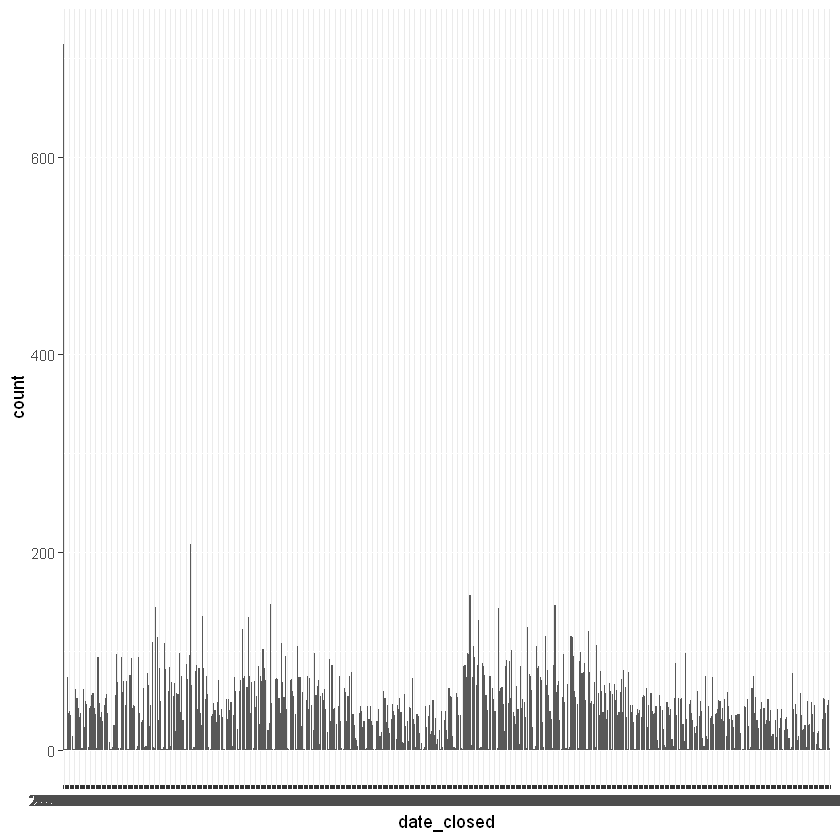

In [15]:
ggplot(data = df) + geom_bar(mapping = aes(x=date_closed))

In [16]:
df %>% count(case_age_days, sort = TRUE)

case_age_days,n
1,4273
2,2648
0,2244
3,2118
4,1537
5,1270
6,1106
7,978
8,846
9,629


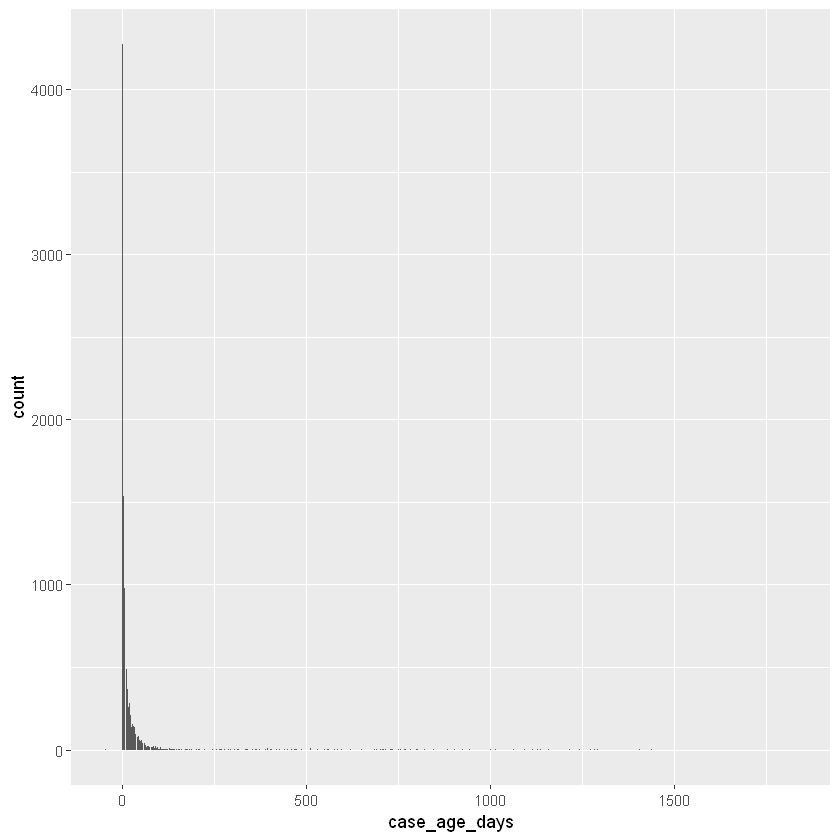

In [17]:
ggplot(data = df) + geom_bar(mapping = aes(x=case_age_days))

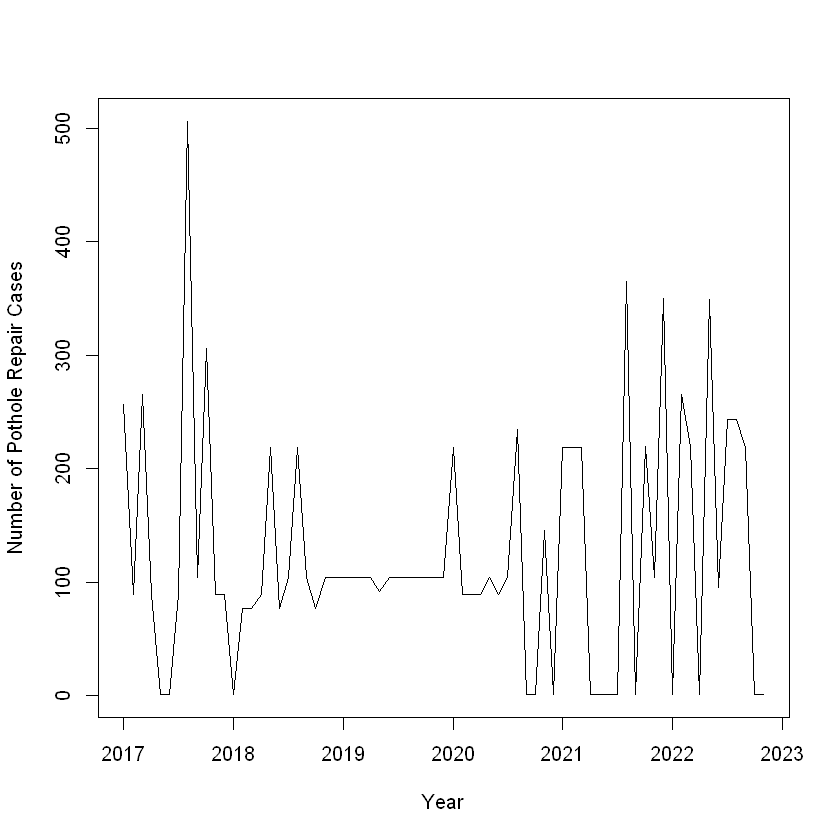

In [21]:
plot(df.ts, xlab = "Year", ylab = "Pothole Repair Cases")

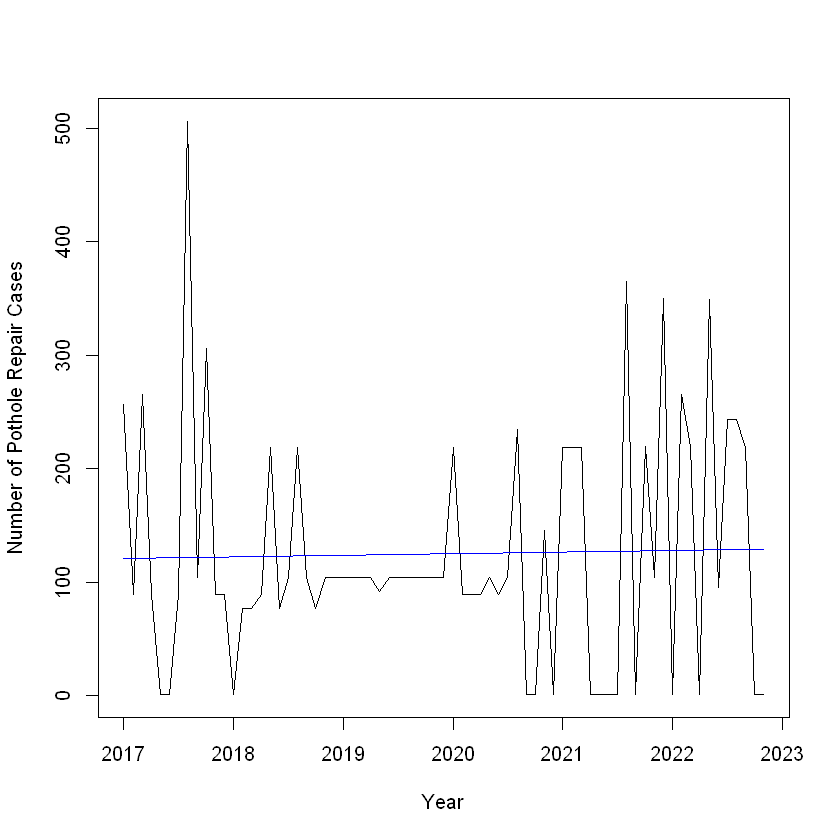

In [22]:
df_lr <- tslm(df.ts ~ trend)
plot(df.ts, xlab = "Year", ylab = "Number of Pothole Repair Cases")
lines(df_lr$fitted.values, col = "blue")

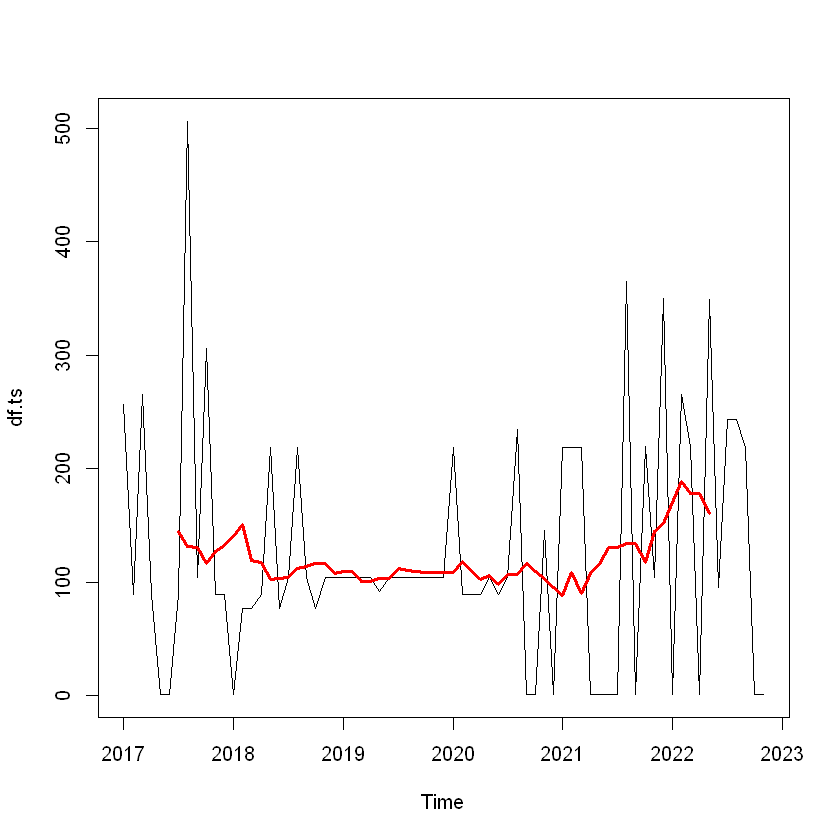

In [23]:
df.MA <- forecast::ma(df.ts, order=13, centre=TRUE)
plot(df.ts)
lines(df.MA, col="red", lwd=3)

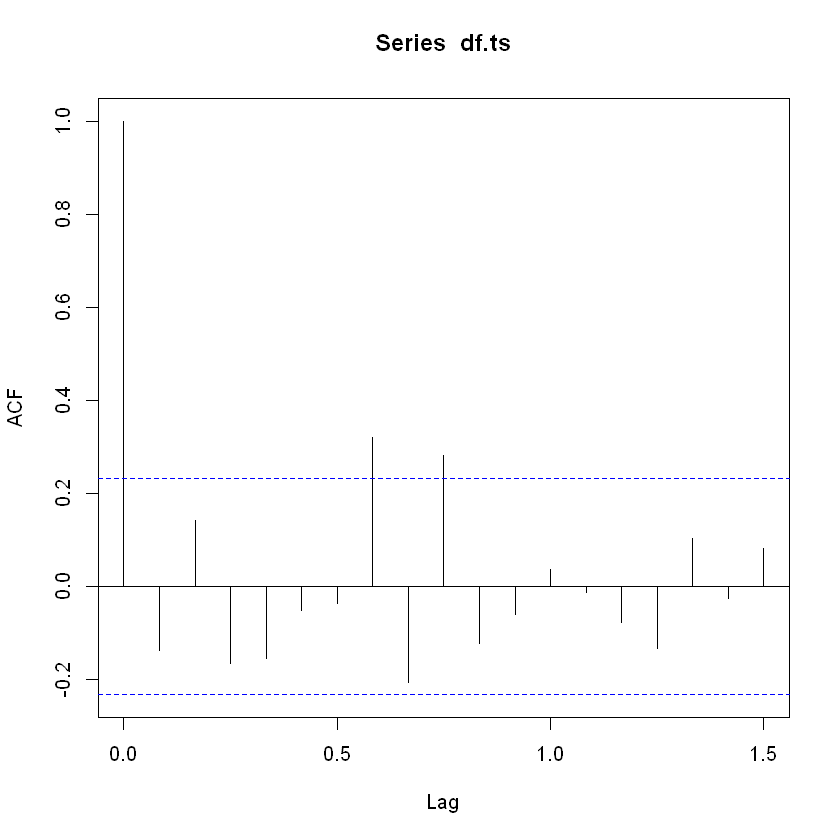

In [24]:
acf(df.ts)

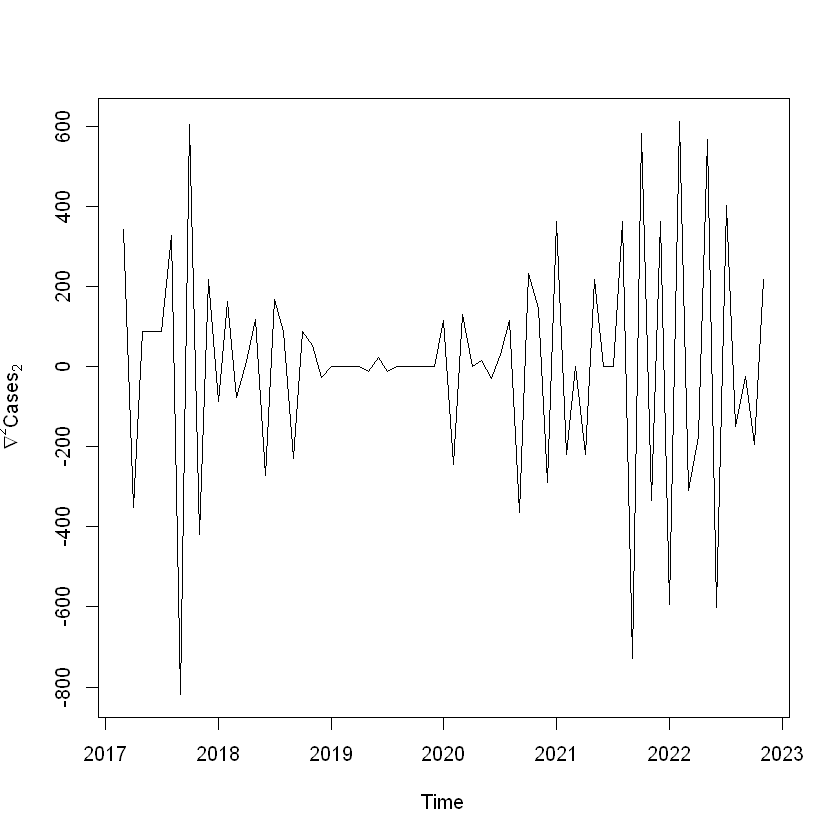

In [25]:
#Differencing
df_D <- diff(df.ts, differences=2)
plot(df_D, ylab = expression(paste(nabla^2, "Cases"[2])))